# Introduction to Statistical Arbitrage

Simplistically speaking, an arbitrage occurrs if you can buy a granny smith apple in Edeka for 1 euro, while you can sell exactly the same one at Edeka for more than 1 euro. In competitive markets that shall not exist as buyers and sellers ensure that the buying and selling price coincide.

A statistical arbitrage trade can be also called probabilistic arbitrage. You are not completely sure to make a risk-less profit, yet, the odds are pretty good. Typical practical implementations refer to long short trading strategies where assets with similar return densities are traded against each other to benefit from temporary dislocations. Here is one example that relates to previous class material. Assume BMW and Daimler trade both at the same CAPM beta and with a CAPM alpha of 0 and 1\%, respectively. Based on NPV logic, Daimler appears under-valued, relative to BMW. Buying Daimler and selling BMW results in a zero beta portfolio with a positive alpha of $1\%$. If both returns are driven by pairwise independent Gaussian shocks (consistent with a single index model) with each having an idiosynscratic volatility of 30\% ,  the return density of the long short trade is

$$
N(1\%, (30\%+30\%)^2).
$$

If you use Python to draw from that distribution, you will notice that you will loose quite often, yet, if you stay in the game for long enough, your average return will be 1\%. A week from now, I will show you how to simulate random variables in Python.

$$
\\
$$



The key to our introduction to statistical arbitrage is the ability to quantify the return density for a particular trading horizon. This lecture introduces you to ARMA models. These can be easily combined with the CAPM and other factor models, often referred to as ARMA-X models. These are backward looking time series models that allow us to quantify the return density with time-varying first and second moments.

# A. Online Lecture


## A.1 Autoregressive Moving Average Modeling (ARMA)

# B. Tutorial and Revision Manual

## Why Use ARMA?

- ARMA(p,q) models are heavily used in industry and research since the 1970s. They build a basic building block for short horizon forecasts and statistical arbitrage trading strategies 


- Remember our return decomposition
 
\begin{align*}
r_t & \equiv \mu_{t-1} + \epsilon_t.
\end{align*}


An ARMA(p,q) assumption for $r_t$ implies that 


* (i) $\mu_{t-1}$ depends linearly on the past $p$ realized returns and on the past $q$ forecast errors; and


* (ii) $\epsilon_t$ is an unforecastable i.i.d. random variable. 




 

$$
\\
$$

## White Noise and Gaussian White Noise

- $\epsilon$ follows a White Noise process if

$$
\epsilon_t \sim i.i.d. \;  (0, \sigma^2_\epsilon).
$$

- A White Noise process fulfills three assumptions:


1. It is drift-less:


$$
E(\epsilon_t) = E(\epsilon_t \vert \epsilon_{t-1},\epsilon_{t-2}, \dotsc) = E(\epsilon_t \vert \text{all information up to t - 1} ) = 0 
$$



2. The past carries no information about the future:


$$
E(\epsilon_t\epsilon_{t-j})=0
$$



3. It is homoscedastic:


$$
var (\epsilon_t) = var (\epsilon_t \vert \epsilon_{t-1}, \epsilon_{t-2}, \dotsc ) = var (\epsilon_t \vert \text{all information up to t - 1} ) = \sigma^2_\epsilon 
$$



$$
\\\\
$$

- $\epsilon_t$ follows a Gaussian White Process if 


$$
\epsilon_t \sim i.i.d. \; N (0, \sigma^2_\epsilon).
$$



- A Gaussian White Noise process adds a fourth one assumption:


$$
Prob(\epsilon_t|\, \epsilon_{t-1}) = Prob(\epsilon_t) = \frac{1}{\sqrt{2\pi \sigma^2_{\epsilon}}} \, e^{-\frac{\epsilon^2_t}{2\sigma^2_{\epsilon}}}. 
$$


$$
\\
$$

## Basic ARMA Models

**Without loss of generality but to simplify notation we  assume  that our stationary process $x$ is demeaned.**

 
**Demeand AR(1):**

$$
AR(1): \quad x_t := \phi \times x_{t-1} + \epsilon_t, \,  \epsilon_t \sim iid(0,\sigma^2_{\epsilon}); \quad x_0 = 0, \; \phi \in \mathcal{R}, \; \sigma^2_{\epsilon} \in \mathcal{R}_+ . 
$$


$$
\\
$$

**Demeaned AR(p):**  

$$AR(p): \quad  x_t = \phi_1  \times  x_{t-1} + \phi_2  \times  x_{t-2} + \dotsc + \phi_p  \times  x_{t-p} + \epsilon_t, \quad x_0 = 0, \; \phi_1, ..., \phi_p \in \mathcal{R}
$$


$$
\\
$$

**Demeand MA(1):**

$$
MA(1):  \quad x_t = \epsilon_t + \theta  \times  \epsilon_{t-1}, \epsilon_t \sim iid(0,\sigma^2_{\epsilon}); \quad x_0 = 0, \; \theta \in \mathcal{R}, \; \sigma^2_{\epsilon} \in \mathcal{R}_+ .
$$

$$
\\
$$

**Demeand MA(q):**


$$
MA(q):  \quad x_t = \epsilon_t + \theta_1   \times  \epsilon_{t-1} + \dotsc +\theta_q  \times  \epsilon_{t-q}, \quad x_0 = 0, \; \theta_1, ..., \theta_q \in \mathcal{R}
$$


$$
\\
$$

**Demeand ARMA(p,q):** 

\begin{align}
x_t & \, \overbrace{:=}^{\text{ARMA(p,q)}} \, \phi_1  \times  x_{t-1} + \phi_2  \times  x_{t-2} + \dotsc + \phi_p  \times  x_{t-p} + \epsilon_t +\theta_1   \times  \epsilon_{t-1} + \dotsc +\theta_q  \times  \epsilon_{t-q} , \quad x_0 = 0,
\end{align}

 


$$
\\
$$

## AR(1) = constrained MA($\infty$)

 
We assume a zero-mean stationary variable $x_t$ follows an $AR(1)$ process, i.e.


$$
x_t := \phi \times x_{t-1} + \epsilon_t; \quad \epsilon_t :\sim i.i.d(0,\sigma^2_{\epsilon}).
$$

$$
\\
$$
We now substitute recursively the AR(1) structure into all x-values, i.e.


\begin{align*}
x_t &= \phi \times (\phi \times x_{t-2} + \epsilon_{t-1}) + \epsilon_{t} \\
&= \phi^2 \times x_{t-2}+ \phi \times \epsilon_{t-1} + \epsilon_{t} \\
&= \phi^k \times x_{t-k} + \phi^{k-1} \times \epsilon_{t-k+1} + \dotsc + \phi^{2} \times \epsilon_{t-2} + \phi \times \epsilon_{t-1} + \epsilon_t
\end{align*}

$$
\\
$$


The process is stationary only for $ |\phi|<1 $. Only if that condition holds, you have that 


$$
\lim_{k \to \infty} \phi^k x_{t-k} = 0
$$


which confirms the intuition that a stationary mean-zero process converges to zero. 



Putting everything together shows that the AR(1) process coincides with a constrained $MA(\infty)$ process


$$
x_t= \sum \limits_{j=0}^{\infty} \phi^j \epsilon_{t-j},
$$


which is constrained in the sense that the MA(q) coefficients $\theta_j,\; j\geq 0$ are not free parameters but exponentials of the AR(1) coefficient $\phi$, i.e. $\theta_j = \phi^j, \forall j \geq 0$.



$$
\\
$$

## Forecasting with ARMA Models

- To simplify the exposition and to get the main learning points across, we will focus on a AR(1) model for a demeaned time-series $x_t$. The same techniques can be applied to any more general ARMA(p,q) model.

$$
\\
$$

**DGP of DEMEANED AR(1):**

\begin{align*}
x_{t+1} & = \phi \times x_{t} + \epsilon_{t+1}, \quad x_0 = 0, \, |\phi|<1,  \; \epsilon_{t+1} \sim i.i.d.(0,\sigma^2_{\epsilon}).
\end{align*}

Conceptually, the conditional 1-step ahead forecast for $x_{t+1}$ is defined as


$$
E[x_{t+1} | \mathcal{F}_{t}],
$$

Hence,

\begin{align*}
E[x_{t+1}|\mathcal{F}_{t}] &\overbrace{=}^{AR(1)} E[\phi \times x_{t} + \epsilon_{t+1} | \mathcal{F}_{t}]. 
\end{align*}

\begin{align*}
E[\phi \times x_{t} + \epsilon_{t+1} | \mathcal{F}_{t}] & = \phi \times x_{t} + E[\epsilon_{t+1} | \mathcal{F}_{t}]. 
\end{align*}


\begin{align*}
E[x_{t+1}|\mathcal{F}_{t}] &\overbrace{=}^{AR(1)} \phi \times x_{t}.
\end{align*}


$$
\\
$$
 
**Next: 2-step ahead Forecast**:


$$
E[x_{t+2} | \mathcal{F}_t].
$$


\begin{align*}
E[x_{t+2}|\mathcal{F}_{t}] & \overbrace{=}^{\text{AR(1)}} E[\phi \times x_{t+1} + \epsilon_{t+2}|\mathcal{F}_{t}] \\\\
&= E[ \phi \times \left( \phi x_t + \epsilon_{t+1}\right) + \epsilon_{t+2} | \mathcal{F}_t ] \\\\
&= E[ \phi^2 \times x_{t} + \phi \times \epsilon_{t+1} + \epsilon_{t+2} | \mathcal{F}_t ] \\\\
&= \phi^2 \times x_{t} + \phi \times E[\epsilon_{t+1}| \mathcal{F}_t] + E[\epsilon_{t+2} | \mathcal{F}_t ] \\\\
&= \phi^2 \times x_{t}.
\end{align*}
  

$$
\\
$$


**Next: k-Step ahead forecast**:  
$$
E[x_{t+k}|\mathcal{F}_{t}] = \phi^k x_t
$$

$$
\\
$$



### Stationary Considerations 


\begin{align*}
\lim_{k \to \infty} E[x_{t+k}|\mathcal{F}_t] &= \lim_{k \to \infty} \phi^k \times x_{t}.
\end{align*}


 


**Case 1:** $|\phi|<1$. In that case, $\lim_{k \to \infty} E[x_{t+k}|\mathcal{F}_t] \rightarrow 0$.


**Case 2:** $|\phi|=1$. In that case, $\lim_{k \to \infty} E[x_{t+k}|\mathcal{F}_t] \rightarrow x_t$. 


**Case 3:** $|\phi|>1$. In that case, $\lim_{k \to \infty} E[x_{t+k}|\mathcal{F}_t] \rightarrow \infty$. 



**Let's have two definitions:**

*Unconditional Forecast: The unconditional forecast of a time series $x_t$ is denoted as $E[x_t]$ or $E[x_t | \mathcal{F}_0]$ and coincides with $\lim_{k \to \infty} E[x_{t+k}|\mathcal{F}_t]$.* 



*Weak Stationarity: A time series $x_t$ is weakly stationary if its unconditional forecast and auto-covariance matrix is time-invariant (i.e. constant)*.



 
### Stationarity Condition 

Stationarity condition:

$$
E[x_t] = E[x_{t-k}]
$$ 
for any $k$. Hence, if $x_t$ follows


$$
x_t = \phi x_{t-1} + \epsilon_t, \; \epsilon_t \sim iid (0,\sigma^2_{\epsilon})
$$


we have


$$
E[x_t] = \phi E[x_{t-1}].
$$


As both unconditional expectations need to be the same, the only solution fulfilling this equation is


$$
E[x_t] = 0.
$$

$$
\\
$$

### What if Data is Not Mean-Zero?

- Either: demean the time-series if the unconditional mean is not of relevane for the analysis

- Or: account explicitly for a constant in the data generating process, i.e. for a AR(1) it implies: 

\begin{align*}
x_{t+1} &= c + \phi x_t + \epsilon_{t+1}, \; \epsilon_{t+1} \sim iid (0,\sigma^2_{\epsilon}), c \in \mathcal{R}, |\phi|<1.
\end{align*}


The conditional one-step ahead forecast is


$$
E[x_{t+1}|\mathcal{F}_t] = c + \phi x_t.
$$
 
 
The conditional two-step ahead forecast is


\begin{align*}
E[x_{t+2}|\mathcal{F}_t] &= E[c + \phi x_{t+1} + \epsilon_{t+2} |\mathcal{F}_t] \\\\
&= E[ c + \phi \left(c+\phi x_t + \epsilon_{t+1} \right) + \epsilon_{t+2}  |\mathcal{F}_t] \\\\
&= c(\phi^0 + \phi^1) +\phi^2 x_t.
\end{align*}


The conditional k-step ahead forecast is 


$$
E[x_{t+k} |\mathcal{F}_t] = c \times (\sum_{i=0}^{k-1} \phi^i) + \phi^k x_t.
$$



The unconditional forecast is


\begin{align*}
\lim_{k \rightarrow \infty} E[x_{t+k}|\mathcal{F}_t] &= c \times \lim_{k\rightarrow \infty} \sum_{i=0}^{k-1} \phi^i + 0 \\\\
&\overbrace{=}^{|\phi|<1} \frac{c}{1-\phi} \\\\
&= E[x_t]. 
\end{align*}

Notice, the more persistent the time series the more different is the unconditional mean from $c$.
 

$$
\\
$$

### Unconditional Forecast

If $x_t$ is a zero-mean AR(1) process, then its unconditional mean forecast is


\begin{align*}
E[x_t] & \equiv \lim_{k \to \infty} E_t[x_{t+k}]  \nonumber \\\\
&= \lim_{k \to \infty} \phi^k \times x_{t} \nonumber \\\\
&= 0, \quad |\phi|<1,
\end{align*}


$$
\\
$$

**Exercise:** Proof that an AR(1) process $x_t$ with mean $\bar{x}$ is expected to converge to $\bar{x}$, i.e.


\begin{align*}
E[x_t] &= \bar{x}.
\end{align*}


$$
\\
$$





## Assessing Risk and Confidence Bounds with ARMA

We will focus on a AR(1) model for a demeaned time-series $x_t$. The same techniques can be applied to any more general ARMA(p,q) model.

$$
\\
$$

The data generating process of a zero-mean AR(1) process is


\begin{align*}
x_{t+1} & = \phi \times x_{t} + \epsilon_{t+1}, \quad x_0 = 0,  \; \epsilon_{t+1} \sim i.i.d.(0,\sigma^2_{\epsilon}).
\end{align*}


The conditional 1-step ahead risk measure is


\begin{align*}
Var(x_{t+1}|\mathcal{F}_{t}) &\overbrace{=}^{\text{AR(1)}} Var(\phi \times x_{t} + \epsilon_{t+1} |\mathcal{F}_t) \\\\
& = \phi^2 Var(x_t|\mathcal{F}_t) + Var(\epsilon_{t+1}|\mathcal{F}_t) \\\\
& = \phi^2 \times 0 + \sigma^2_{\epsilon} \\\\
& = \sigma^2_{\epsilon}.
\end{align*}


The conditional 2-step ahead risk measure is


\begin{align*}
Var(x_{t+2}|\mathcal{F}_{t}) & \overbrace{=}^{\text{AR(1)}} Var(\phi \times x_{t+1} + \epsilon_{t+2} | \mathcal{F}_{t})   \\\\
& = Var(\phi^2 \times x_t + \phi \times \epsilon_{t+1} + \epsilon_{t+2} |\mathcal{F}_{t} ) \\\\
& = \phi^4 Var(x_t|\mathcal{F}_t) + \phi^2 Var(\epsilon_{t+1}|\mathcal{F}_t) + Var(\epsilon_{t+2}|\mathcal{F}_t) \\\\
& = 0 + \phi^2 \sigma^2_{\epsilon} +\sigma^2_{\epsilon} \\\\
& = (1 + \phi^2) \times \sigma^2_{\epsilon}.
\end{align*}


The conditional k-step ahead risk measure is


\begin{align*}
Var(x_{t+k} | \mathcal{F}_t) &= (\phi^0+\phi^2 + ... + \phi^{2(k-1)} ) \times \sigma^2_{\epsilon}.
\end{align*}


The unconditional risk measure is for a AR(1) process can be found by exploiting the stationarity condition


\begin{align*}
Var(x_{t+1}) &= \phi^2 Var(x_t) + \sigma^2_{\epsilon} \\\\
Var(x_t) &= \frac{\sigma^2_{\epsilon}}{1-\phi^2}.
\end{align*}


$$
\\ 
$$


Note, if you want to quantify risk with a different measure than variance, you need to take a stand on the iid probability density function of the White Noise process. If we assume that the forecast error follows a Gaussian White Noise Process, we do basically say that as of now, the k-step ahead realization of a zero mean AR(1) process follows a Gaussian distribution that is centered around $\phi^k x_t$ with variance $(\phi^0+\phi^2 + ... + \phi^{2(k-1)} ) \times \sigma^2_{\epsilon}$, i.e.


\begin{align*}
x_{t+k}|\mathcal{F}_t \, \overbrace{\sim}^{GWN} \,  N(\phi^k \times x_{t}, \, (1 + \phi^2 + \phi^4 + ... + \phi^{2(k-1)}) \times \sigma^2_{\epsilon} ).
\end{align*}


If forecast errors follow a non-Gaussian distribution, then $x_{t+k}|\mathcal{F}_t $ follows a non-Gaussian distribution.

---

# C. Quizzes - Basics

on ilias

# D. Exercises - Basics 

## D.1 ARMA and Return Decomposition

Explain how an ARMA(p,q) model fits into the general return notation of $r_t = \mu_{t-1} + \epsilon_t$.

## D.2 White Noise

Characterize a White Noise process.

## D.3 Gaussian White Noise

Characterize a Gaussian White Noise Process.

## D.4 Gaussian White Noise

Write down the parameterized probability density function of a Gaussian White Noise Process.

## D.5 Data Generating Processes of some ARMA

Write down the DGP of an AR(1), MA(1), MA($\infty)$ and ARMA(1,1) process.

## D.6 Unconditional vs Conditional Forecast

Explain the difference between an unconditional and a conditional forecast.

## D.7 Weakly Stationarity

What characterizes a weakly stationary time-series?

## D.8 Unit-Root

Write down an AR(1) process with a unit root.

## D.9 Conditional vs Unconditional Risk

What is conditional and unconditional risk in a Gaussian model?

# E. Exercises  - Challenging 

## E.1 AR(1) as MA($\infty$)

Show in detail how to re-write an AR(1) as a constrained MA($\infty$) process.

## E.2 Statistical Arbitrage with AR(1)

Assume a factor follows the following AR(1) model: $f_t = c + \phi f_{t-1} + \epsilon_t$ with $\epsilon_t$ being a White Noise process. Derive the conditional 1-step, 2-step, k-step ahead forecasts and the unconditional forecast.

## E.3 Convergence of AR(1)

Assume the AR(1) model of some factor of interest reads $f_t = 0.06 + 0.95 \times f_{t-1} + \epsilon_t$, with $\epsilon_t$ being a White Noise process. Where is $f_t$ converging to?

# E.4 AR(2) for Statistical Arbitrage

Assume some factor of interest follows a AR(2) model. Determine the 1-step, 2-step and unconditional variance estimate.

# F. Python for Financial Data Analysis

Dear students,

We approach the time-series modeling part as follows. First, you learn about ARMA models. Second, you learn how to siumulate these. Third, you learn how to estimate these. These estimations will lead us into the machine learning aspects of our course.

The current problem set does therefore NOT talk about the simulation, nor the estimation of ARMA models. As we do not yet talk about the machine learning aspects, we will rely heavily on Python packages. 

Now, I show you how you can determine the auto regressive order using the Bayesian Information Criterium. 

There are different ways of obtaining the same solution. Here, I present you with an approach that relies on Python coding, yet, demands a bit of work from us. 

**packages**

we will need the following Python packages

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

**We read in the data of interest**

In [3]:
returns = np.genfromtxt('AR2_Series.csv',delimiter=',')

Let's first visualize the time-series of the return that we try to model as an AR(p) process.

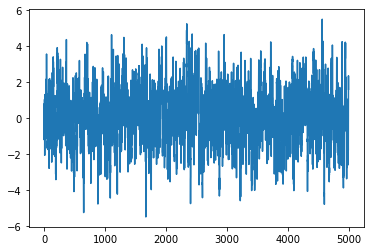

In [4]:
plt.plot(returns);

OK, now, let's go easy on the problem. At first we need to generate the lagged data for all AR-model specifications which we want to test for. We can get these lagged data from the auxiliary function "lag_data", which returns a numpy array containing the time series data from lag 1 up to the maximum lag length.

In [5]:
def lag_data(data, lags):
    
    n = len(data)
    lagged_data = np.zeros((n-lags,lags))
    
    for i in range(lags):
        lagged_data[:,-(i+1)] = data[i:(n-lags+i)]
    ts_data = data[lags:]
    
    return lagged_data, ts_data

The idea is now to test each possible model specification AR(1), AR(2)...,AR($p_{max}$) in consecutive order by using a for loop. This means that we calculate the BIC value for each model and from all these values we finally select the model for which we have obtained the smallest BIC value.

Notice, the BIC criterion reads

$$BIC(p) := \frac{-2}{T}ln(L) + \frac{ln(T)}{T}\cdot p$$

We are going to use a Python package to obtain the log likelihood value for the BIC formula. This likelihood value is automatically returned by the OLS function of the statsmodels package. Notice, once we enter the machine learing part of our course, we will revisit the question of how to compute the likelihood from the OLS function. For now, we leave technical questions aside.

In [6]:
def BIC(data, max_lags):

    BIC_values = np.zeros(max_lags)
    X,Y = lag_data(data, max_lags)

    for l in range(max_lags):

        x_lag = X[:,0:l+1]
        
        T = len(data)
        
        log_likelihood = sm.OLS(Y,sm.add_constant(x_lag)).fit().llf
        
        p = l+2 # nr of parameters estimated by OLS
        
        BIC_values[l] = (-2/T) * log_likelihood + (np.log(T)/T) * p

    opt_lags = 1+np.where(BIC_values==min(BIC_values))[0].item()

    return BIC_values, opt_lags

Now let's run the function BIC for our return series and see the result:

In [7]:
BIC_values, optimal_lags = BIC(returns,10)

The function returns the 10 BIC values which correspond to the AR(1),...,AR(10) models, as well as the  optimal value for p according to the BIC criterion.

In [8]:
BIC_values

array([2.85685434, 2.82047395, 2.82213586, 2.82364301, 2.82493466,
       2.82651189, 2.82818312, 2.82987282, 2.83151939, 2.83315569])

In [9]:
optimal_lags

2

Given the previous output we conclude that the AR(2) model gives us the lowest BIC value which translates into being the most favorable AR(p) model according to the BIC criterium.

And as a final note, I want to reveal, that I have indeed generated the time-series from the CSV file with an AR(2) parametrization and a level parameter equal to zero, slope parameters equal to 0.6 and 0.2, as well as variance parameter of 1, respectively.